In [1]:
## Imports
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler
import os
import numpy as np

In [19]:
## Benzene Test Cases
nWavefunctions=23
referenceEnergies = np.array( [ -9.791997000000000,-9.791806000000000,-9.791746000000000,-9.791384000000000,   
                                -9.791313000000000,-9.791129000000000,-0.777636800000000,-0.674908000000000,    
                                -0.674900600000000,-0.544847700000000,-0.544836100000000,-0.478288500000000,     
                                -0.409873800000000,-0.406600100000000,-0.378339300000000,-0.378337500000000,    
                                -0.340971300000000,-0.304777300000000,-0.304703800000000,-0.240343300000000,
                                -0.240322100000000,-0.127970198340254,-0.1274085578653838]) 
#                                 -0.240322100000000])#,-0.127970198340254,-0.1274085578653838]) 

resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/benzeneTests/'
# file='scipyAnderson_init1Sonly_gaugeShift-0.5_tcOrder8_theta0.7_PCI_1e-06_GREEN_1416000.csv'
# file='scipyAnderson_init1Sonly_init1e-3_tcOrder8_theta0.7_PCI_1e-06_GREEN_1416000.csv'
# file='scipyAnderson_init1Sonly_tcOrder8_theta0.7_PCI_3e-07_GREEN_1997000.csv'

file='scipyAnderson_initAtomic_eigensolveTol_take2_3e-5_PCI_3e-07_GREEN_2067000.csv'

# file='tc_gaugeShift0p5_tcOrder8_theta0.8_LW5_500_mixingHistory10_GREEN_1485000.csv'
# file='tc_gaugeShift0p5_mindepth3_tcOrder7_theta0.8_LW5_500_mixingHistory6_GREEN_1485000.csv'

plotsDir = resultsDir+'plots/'

df = pd.read_csv(resultsDir+file, header=0)
df;

In [4]:
## Carbon Monoxide Molecule
nWavefunctions=7
referenceEnergies = np.array( [   -1.871953147002199813e+01, -9.907188115343084078e+00,
                                  -1.075324514852165958e+00, -5.215419985881135645e-01,
                                  -4.455527567163568570e-01, -4.455527560478895199e-01,
                                  -3.351419327004790394e-01
                            ] )

                               
resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/fixedPointImplementation/'
# file='CO_rootfindingTests_anderson_LW5_500_GREEN_375500.csv'  
# file='CO_rootfindingTests_andersonImmediately_LW5_500_GREEN_375500.csv'
# file='CO_rootfindingTests_andersonLineSearch_LW5_500_GREEN_375500.csv'
# file='CO_rootfindingTests_krylovImmediately_LW5_500_GREEN_375500.csv'
# file='CO_omitingLeafWithNucleus_anderson_LW5_500_GREEN_373750.csv'

# file='CO_omitingLeafWithNucleus_anderson_LW5_500_GREEN_373750.csv'
# file='CO_refiningLeafWithNucleus_anderson_LW5_500_GREEN_375500.csv'
# file='O2_rootfindingTests_anderson_LW5_500_GREEN_375500.csv'

file='CO_initPower_2e-5_anderson_LW5_1000_GREEN_680000.csv'

# file='CO_rootfindingTests_broyden1_LW5_500_GREEN_375500.csv'
# file='CO_rootfindingTests_PowerIteratiton_LW5_500_GREEN_375500.csv'

plotsDir = resultsDir+'plots/'

df = pd.read_csv(resultsDir+file, header=0)
df;

In [166]:
## O2 Molecule
nWavefunctions=10
referenceEnergies = np.array( [   -1.871953147002199813e+01, -9.907188115343084078e+00,
                                  -1.075324514852165958e+00, -5.215419985881135645e-01,
                                  -4.455527567163568570e-01, -4.455527560478895199e-01,
                                  -3.351419327004790394e-01, 0.0, 0.0, 0.0
                            ] )

                               
resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/fixedPointImplementation/'


file='O2_rootfindingTests_anderson_LW5_500_GREEN_375500.csv'


plotsDir = resultsDir+'plots/'

df = pd.read_csv(resultsDir+file, header=0)
df;

In [5]:
df;

In [20]:
## Filling residual and error 
residualsMatrix = np.zeros((df.shape[0],nWavefunctions))
# print(np.shape(residualsMatrix))
# print(np.shape(df.orbitalResiduals[0][1:-1].split()))
errorsMatrix = np.zeros((df.shape[0],nWavefunctions))
eigenvaluesMatrix = np.zeros((df.shape[0],nWavefunctions))
errorsMatrix1st = np.zeros((df.shape[0],nWavefunctions))
# print('Starting at 1 instead of 0, this is for a Benzene dataframe that had different format in row 1.')
# for i in range(1,df.shape[0]):
for i in range(df.shape[0]):
#     print('i = ', i)
    residualsMatrix[i,:] = np.array(df.orbitalResiduals[i][1:-1].split(),dtype=float)
    errorsMatrix[i,:] = abs( np.array( df.energyEigenvalues[i][1:-1].split(),dtype=float) - referenceEnergies )
    eigenvaluesMatrix[i,:] =  np.array( df.energyEigenvalues[i][1:-1].split(),dtype=float) 
##    errorsMatrix[i,:] = np.array( df.energyEigenvalues[i][1:-1].split(),dtype=float)
    try:
        errorsMatrix1st[i,:] = np.array( df.energyErrorsWRTfirstSCF[i][1:-1].split(),dtype=float) 
    except AttributeError:
        pass

for i in range(nWavefunctions):
    df['residual'+str(i)] = residualsMatrix[:,i]
    df['errors'+str(i)] = np.abs(errorsMatrix[:,i])
    df['eigenvalue'+str(i)] = eigenvaluesMatrix[:,i]

In [5]:
def plotFirstSCF(df):
    

    
    f0, (ax0) = plt.subplots(1,1, figsize=(10,4))
    f0, (ax1) = plt.subplots(1,1, figsize=(10,4))
    f0, (ax2) = plt.subplots(1,1, figsize=(10,4))
    for i in range(nWavefunctions):
#     for i in range(6):
#     for i in range(10,nWavefunctions):
        df.plot(y='residual'+str(i),marker='o',ax=ax0,logy=True,label='psi'+str(i),legend=True)
        df.plot(y='errors'+str(i),marker='o',ax=ax2,logy=True,label='psi'+str(i),legend=False)
        df.plot(y='eigenvalue'+str(i),marker='o',ax=ax1,logy=False,label='psi'+str(i),legend=False)

    
    ax0.set_xlabel('Iteration Number')
    ax0.set_ylabel('Residual L2 Norm')
    ax0.set_title('Orbital Residuals -- Broyden after 1e-2')

    ax2.set_xlabel('Iteration Number')
    ax2.set_ylabel('Energy Error (Hartree)')
##    ax1.set_ylim([1e-4,2e-2])
    ax2.set_title('Eigenvalue Errors')
    ax2.grid()


    ax1.set_xlabel('Iteration Number')
    ax1.set_ylabel('Energy (Hartree)')   
##    ax1.set_ylim([1e-4,2e-2])
    ax1.set_title('Wavefunction Eigenvalues')


#     plt.suptitle('Eigenvalue Errors')
#     plt.suptitle('Convergence of Green Iterations for Benzene')
#     plt.suptitle('Convergence of Green Iterations for Oxygen')


    plt.show()

<IPython.core.display.Javascript object>


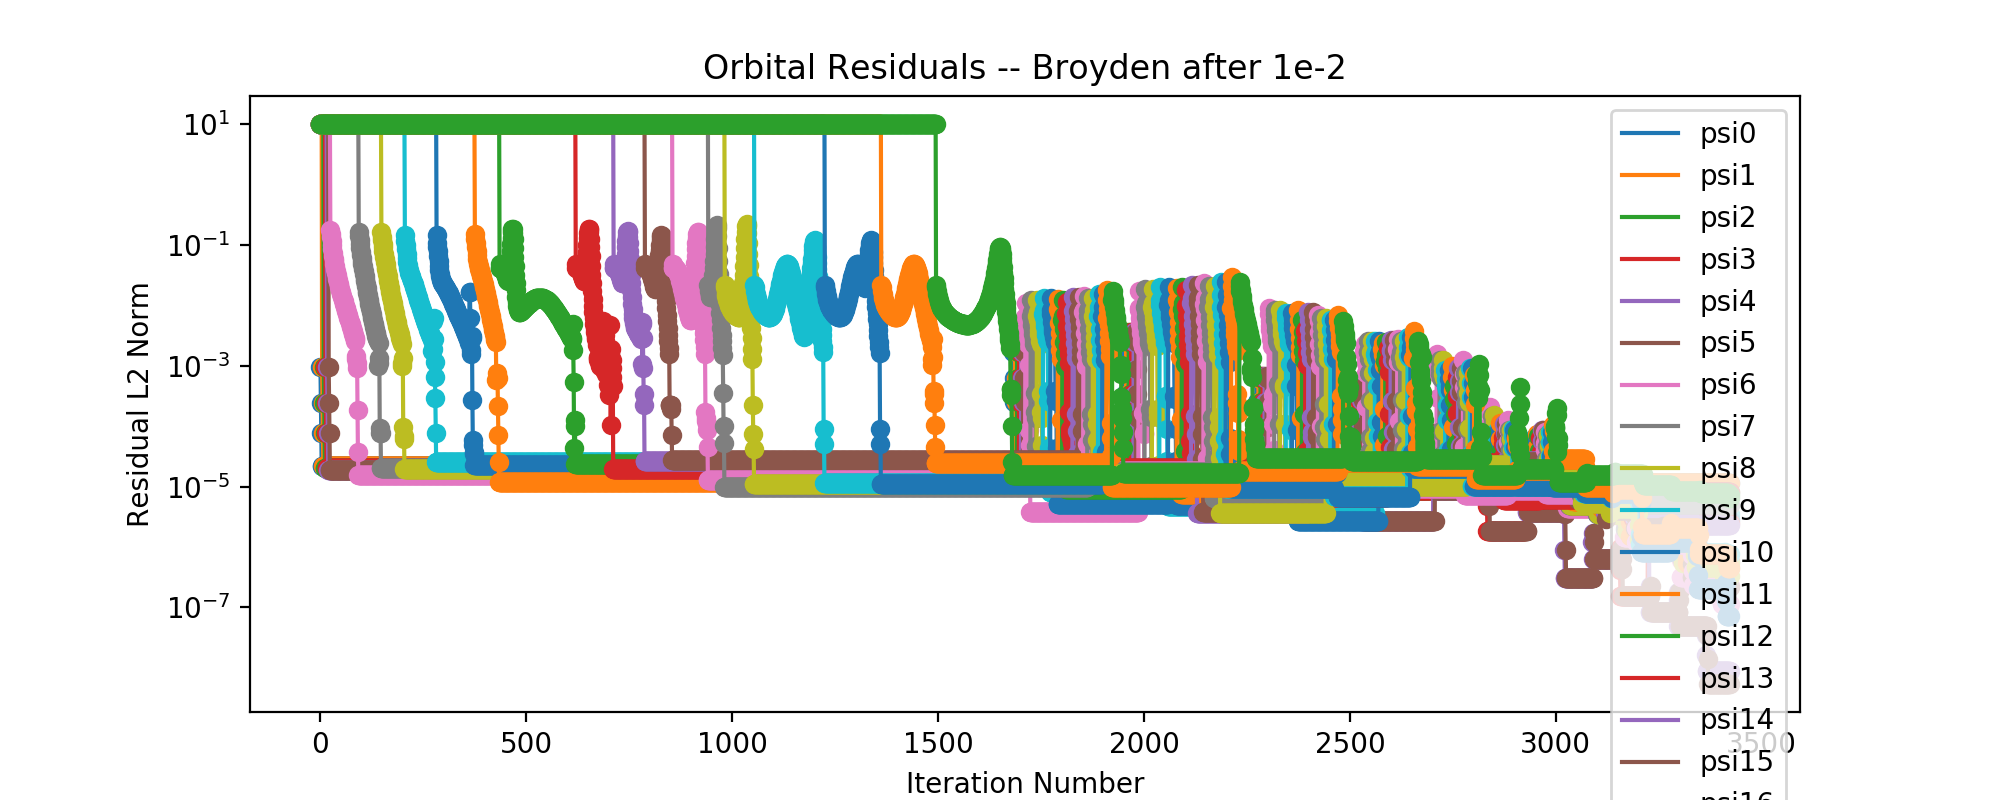

<IPython.core.display.Javascript object>


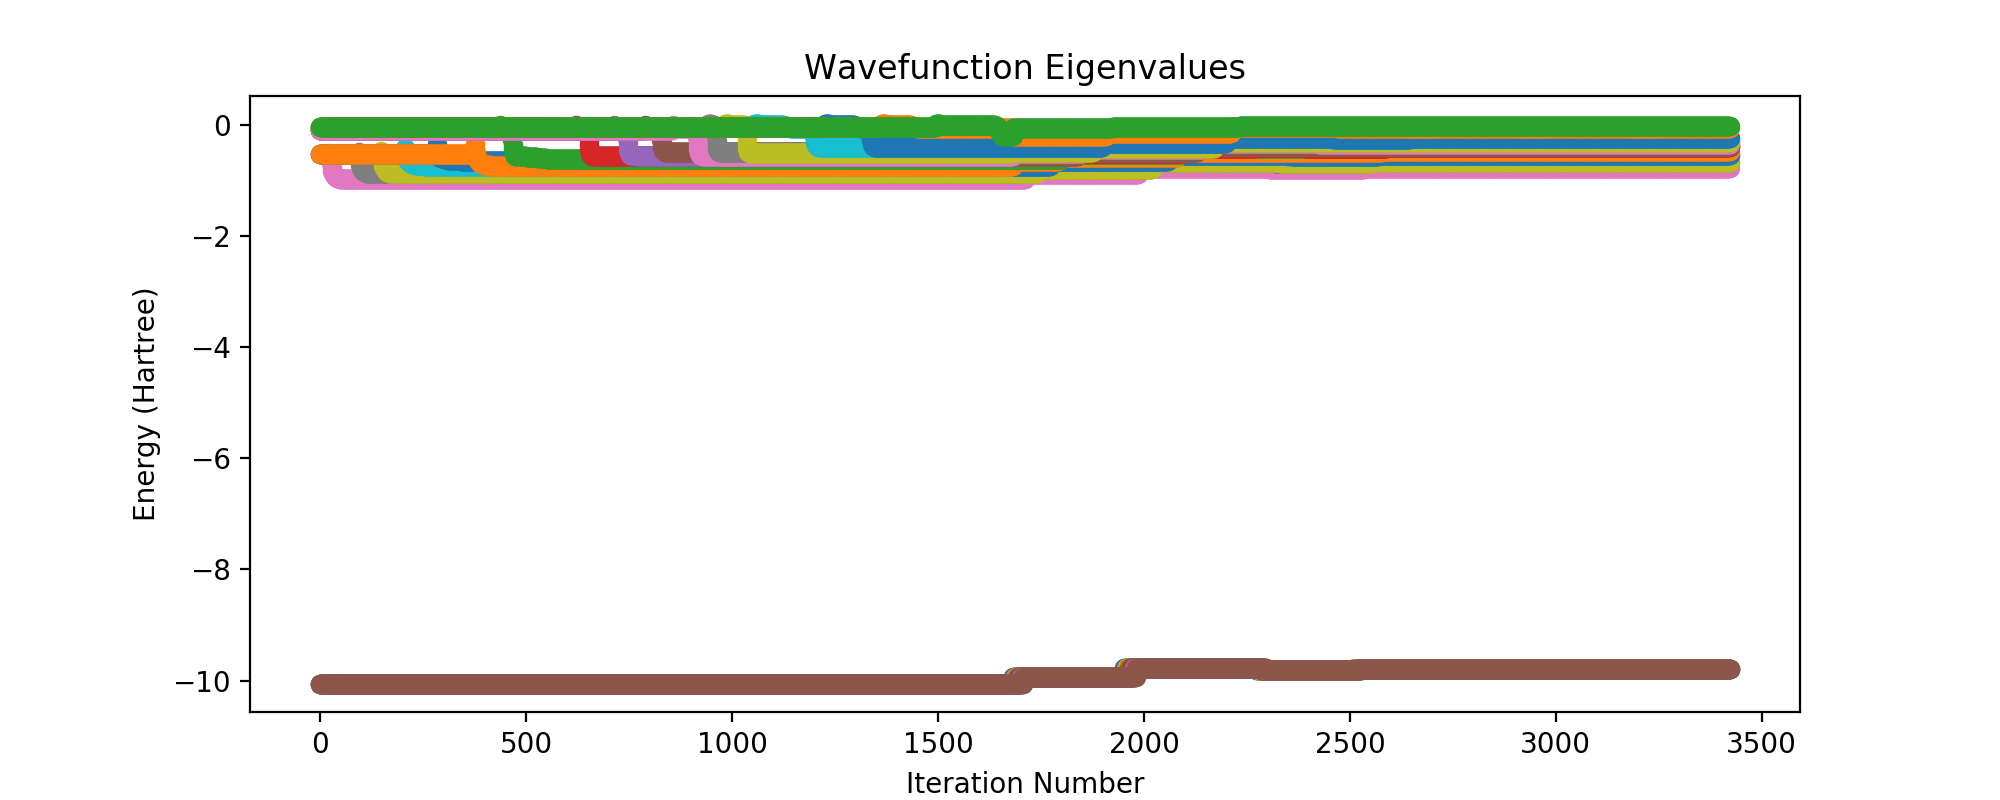

<IPython.core.display.Javascript object>


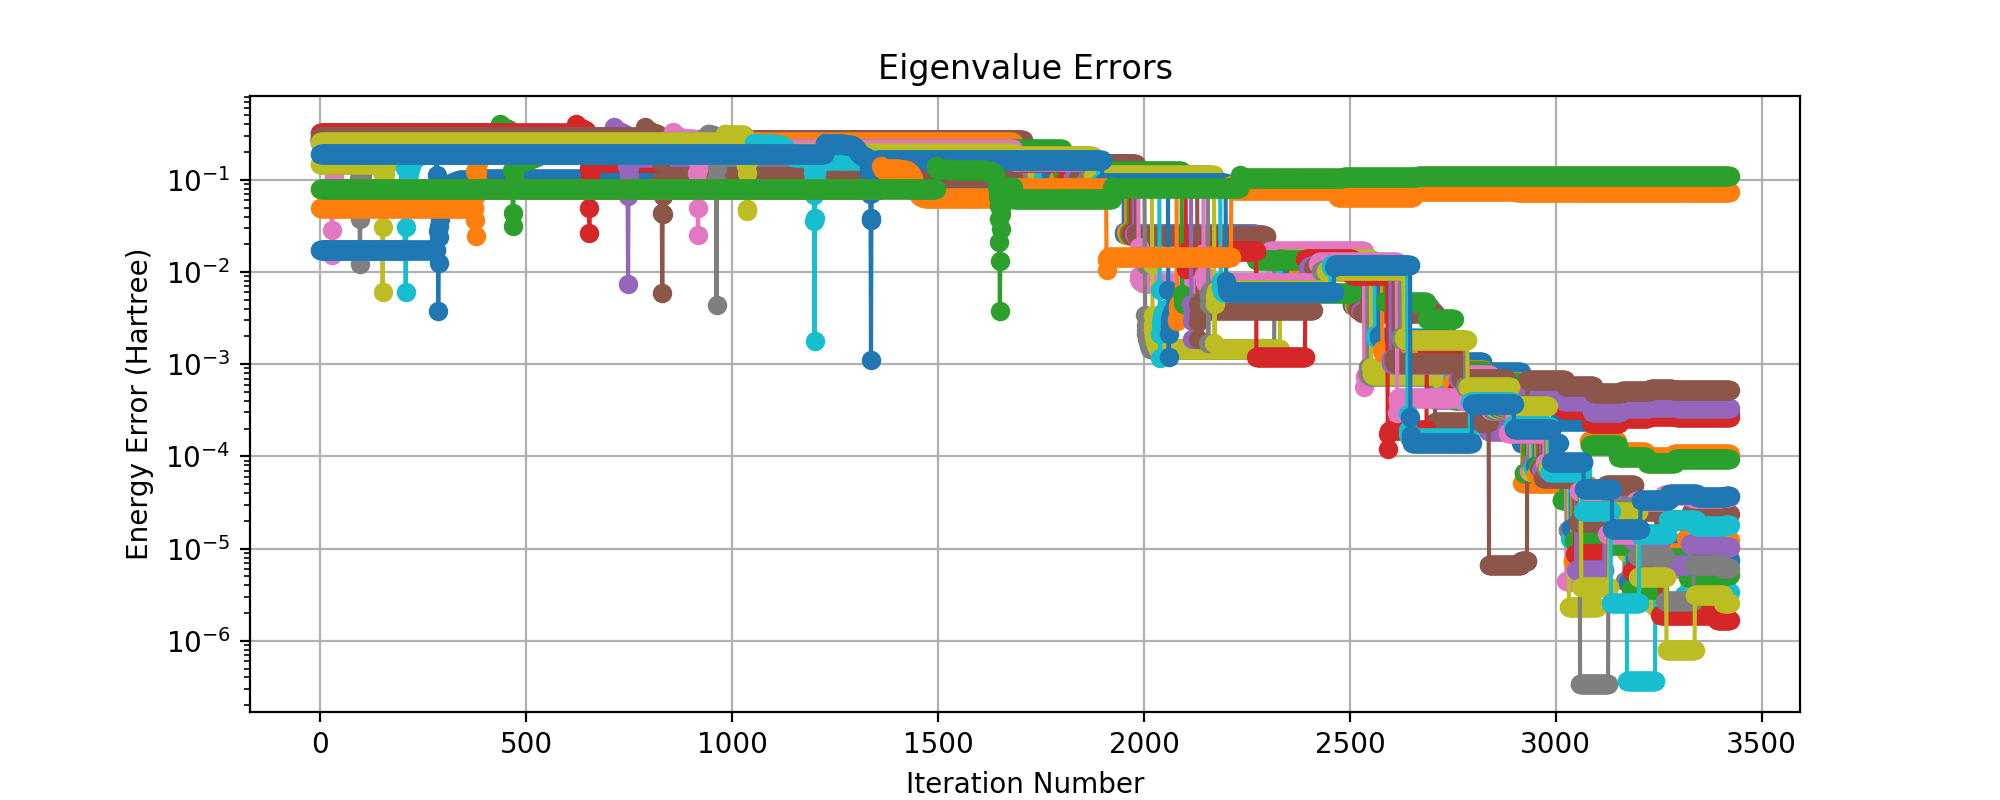

In [21]:
plotFirstSCF(df)